## Final Task (insurance.csv)

### 데이터 읽기

In [109]:
import pandas as pd

df = pd.read_csv("insurance.csv")

In [110]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### 불필요한 열 제거하기

In [113]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [114]:
df.drop(columns='children', inplace=True)
df.head(5)

,age,sex,bmi,smoker,region,expenses
0,19,female,27.9,yes,southwest,16884.92
1,18,male,33.8,no,southeast,1725.55
2,28,male,33.0,no,southeast,4449.46
3,33,male,22.7,no,northwest,21984.47
4,32,male,28.9,no,northwest,3866.86


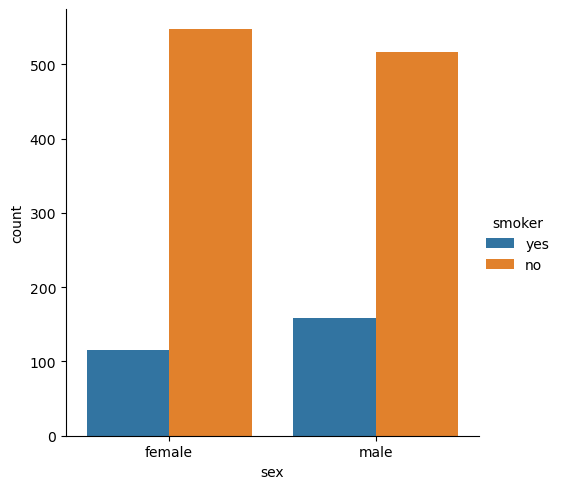

In [115]:
import seaborn as sns

sns.catplot(x ="sex", hue ="smoker",
kind ="count", data = df)

## 중복 데이터 찾기 및 제거하기
### duplicated()

In [116]:
df[df.duplicated()]

,age,sex,bmi,smoker,region,expenses
581,19,male,30.6,no,northwest,1639.56


## drop_duplicates()

In [117]:
df.drop_duplicates(inplace = True)
df[df.duplicated()]
df.tail(10)

,age,sex,bmi,smoker,region,expenses
1328,23,female,24.2,no,northeast,22395.74
1329,52,male,38.6,no,southwest,10325.21
1330,57,female,25.7,no,southeast,12629.17
1331,23,female,33.4,no,southwest,10795.94
1332,52,female,44.7,no,southwest,11411.69
1333,50,male,31.0,no,northwest,10600.55
1334,18,female,31.9,no,northeast,2205.98
1335,18,female,36.9,no,southeast,1629.83
1336,21,female,25.8,no,southwest,2007.95
1337,61,female,29.1,yes,northwest,29141.36


## Null 값 제거
### dropna()

In [118]:
df.isnull().head(10)

,age,sex,bmi,smoker,region,expenses
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


<Axes: >

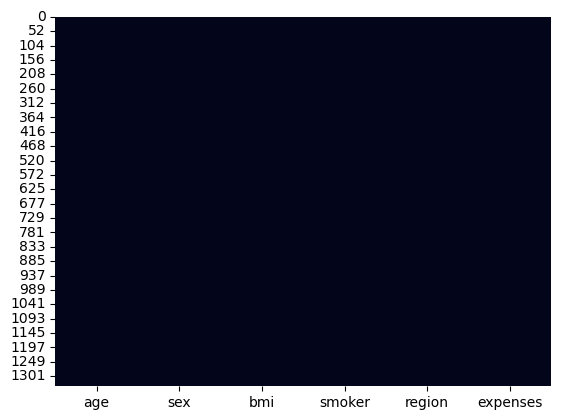

In [119]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [120]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
expenses    0
dtype: int64

In [121]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
expenses    0
dtype: int64

## rename() 이용하여 열 이름 바꾸기
### sex -> gender, charges -> Charges

In [122]:
df.rename(columns={
    'sex': 'gender',
    'expenses' : 'Charges'
}, inplace=True)
df.columns

Index(['age', 'gender', 'bmi', 'smoker', 'region', 'Charges'], dtype='object')

## replace() 이용하여 행 값 바꾸기
### female -> 1, male -> 0 

In [123]:
df.head(10)
df.replace({'gender': {'male': 0}}, inplace = True)
df.replace({'gender': {'female': 1}}, inplace = True)
df

,age,gender,bmi,smoker,region,Charges
0,19,1,27.9,yes,southwest,16884.92
1,18,0,33.8,no,southeast,1725.55
2,28,0,33.0,no,southeast,4449.46
3,33,0,22.7,no,northwest,21984.47
4,32,0,28.9,no,northwest,3866.86
...,...,...,...,...,...,...
1333,50,0,31.0,no,northwest,10600.55
1334,18,1,31.9,no,northeast,2205.98
1335,18,1,36.9,no,southeast,1629.83
1336,21,1,25.8,no,southwest,2007.95


## 이상 값 처리

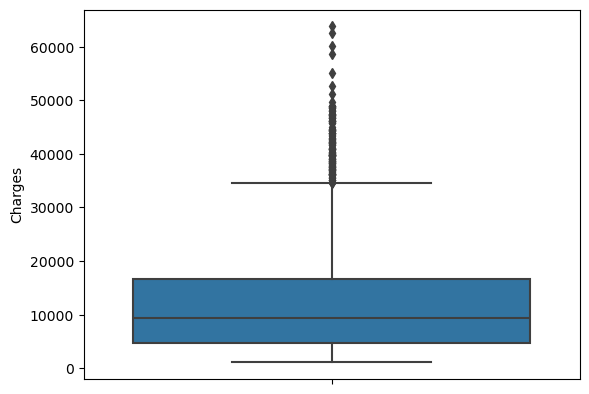

In [124]:
sns.boxplot(y = df['Charges'] );

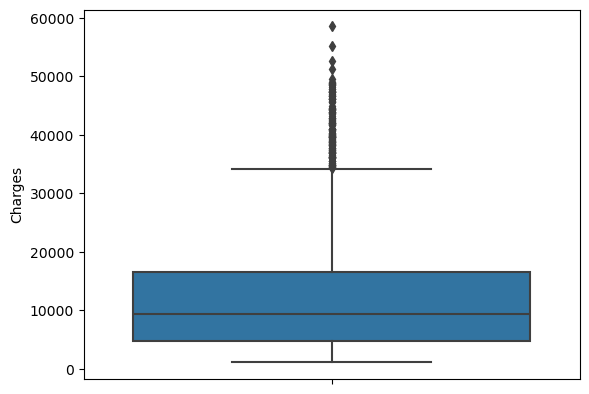

In [125]:
df.drop(df[df.Charges >= 60000].index, inplace = True)
sns.boxplot(y = df['Charges'] );

## Min-max 방법을 이용하여 데이터 정규화

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Charges']] = scaler.fit_transform(df[['Charges']])
df.describe()

,age,gender,bmi,Charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.197151,0.495502,30.650300,0.209705
std,14.049029,0.500167,6.089373,0.207134
min,18.000000,0.000000,16.000000,0.000000
25%,27.000000,0.000000,26.225000,0.062985
50%,39.000000,0.000000,30.350000,0.143566
75%,51.000000,1.000000,34.700000,0.268505
max,64.000000,1.000000,53.100000,1.000000


## 'charges' 컬럼과 상관 관계가없는 컬럼 삭제

<Axes: >

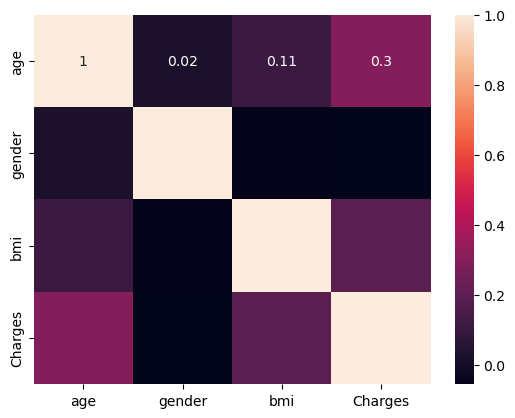

In [127]:
sns.heatmap(df.corr(), annot=True)

In [128]:
df.drop(columns='gender', inplace=True)
df.columns

Index(['age', 'bmi', 'smoker', 'region', 'Charges'], dtype='object')